In [3]:
import pandas as pd

df = pd.read_csv('/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset_annotations.csv')
df

,image_name,image_url,xmin,xmax,ymin,ymax
0,Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg,https://requestor-proxy.figure-eight.com/figur...,59,109,300,357
1,Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg,https://requestor-proxy.figure-eight.com/figur...,53,101,257,309
2,FGmto9ZBGMNr_s4_c89G_g_zoom_5___1_11.jpg,https://requestor-proxy.figure-eight.com/figur...,710,826,295,433
3,1Qn5_JRh_Bb8axrWdUej8A_zoom_5___1_9.jpg,https://requestor-proxy.figure-eight.com/figur...,347,389,218,317
4,1Qn5_JRh_Bb8axrWdUej8A_zoom_5___1_9.jpg,https://requestor-proxy.figure-eight.com/figur...,342,381,316,425
...,...,...,...,...,...,...
2252,y1SR9VEd5KAen1iusx2Hdg_zoom_5___1_5.jpg,https://requestor-proxy.figure-eight.com/figur...,538,590,298,354
2253,ZBoz4vPEr1c9Qz25C6CV-g_zoom_5___1_0.jpg,https://requestor-proxy.figure-eight.com/figur...,685,723,306,349
2254,ZBoz4vPEr1c9Qz25C6CV-g_zoom_5___1_12.jpg,https://requestor-proxy.figure-eight.com/figur...,833,874,286,328
2255,zCtKblvtFS0olTVtnOHWbQ_zoom_5___1_7.jpg,https://requestor-proxy.figure-eight.com/figur...,265,299,262,301


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  2257 non-null   object
 1    image_url  2257 non-null   object
 2    xmin       2257 non-null   int64 
 3    xmax       2257 non-null   int64 
 4    ymin       2257 non-null   int64 
 5    ymax       2257 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 105.9+ KB


In [3]:
df.describe()

,xmin,xmax,ymin,ymax
count,2257.000000,2257.000000,2257.000000,2257.000000
mean,516.705361,572.592379,309.746566,384.462561
std,302.748791,303.288366,170.445509,173.910269
min,0.000000,29.000000,0.000000,13.000000
25%,245.000000,303.000000,233.000000,301.000000
50%,524.000000,583.000000,287.000000,350.000000
75%,786.000000,844.000000,339.000000,415.000000
max,1037.000000,1050.000000,1022.000000,1050.000000


### There are no missing values

In [9]:
from pathlib import Path

PATH = Path("/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset")
list(PATH.iterdir())[:5]

[PosixPath('/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset/j405wJThv5K_xS8DfusUow_zoom_5___1_6.jpg'),
 PosixPath('/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset/Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg'),
 PosixPath('/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset/57RyEsvd32kH-qe4mk8d8Q_zoom_5___2_1.jpg'),
 PosixPath('/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset/FGmto9ZBGMNr_s4_c89G_g_zoom_5___1_11.jpg'),
 PosixPath('/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset/hjFahFKnmHpdqzToLzjmsQ_zoom_5___1_12.jpg')]

In [10]:
import cv2
import matplotlib.pyplot as plt 

def read_image(path):
    img = cv2.imread(str(path))
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

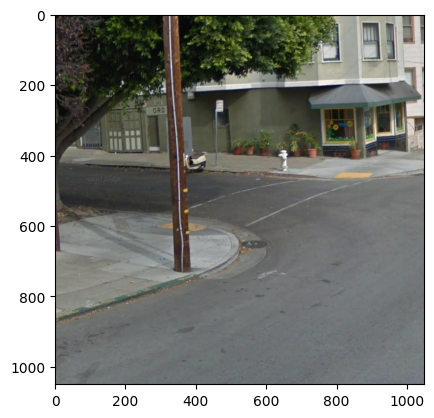

In [53]:
path = PATH/'4nlfxiAsogejFUWaBmiysQ_zoom_5___1_5.jpg'
img = read_image(path)
plt.imshow(img)

In [37]:
img = cv2.imread(str(path))
img.shape

(1050, 1050, 3)

In [38]:
import numpy as np
import cv2
from pathlib import Path

# Define your PATH variable if not already defined. For example:
# PATH = Path('/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset')

# Define allowed image extensions
allowed_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif'}

# Filter files to include only those with the allowed extensions
files = [p for p in PATH.iterdir() if p.suffix.lower() in allowed_extensions]

img_shapes = []

for p in files:
    img = cv2.imread(str(p))
    if img is not None:
        shape = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).shape
        img_shapes.append(shape)
    else:
        print(f"Warning: Failed to read image at {p}")

unique_shapes = np.unique(img_shapes, axis=0)
print(unique_shapes)


[[1050 1050    3]]


All images are of the same size

# Check Accuracy of Existing Labels

In [55]:
first_row = df[df['image_name'] == '4nlfxiAsogejFUWaBmiysQ_zoom_5___1_5.jpg'].iloc[0]
first_row

image_name              4nlfxiAsogejFUWaBmiysQ_zoom_5___1_5.jpg
 image_url    https://requestor-proxy.figure-eight.com/figur...
 xmin                                                       453
 xmax                                                       486
 ymin                                                       237
 ymax                                                       285
Name: 274, dtype: object

In [56]:
bounding_box = { 'xmin': first_row[' xmin'], 'ymin': first_row[' ymin'], 'xmax': first_row[' xmax'], 'ymax': first_row[' ymax'], 'label': 'Parking Sign' }

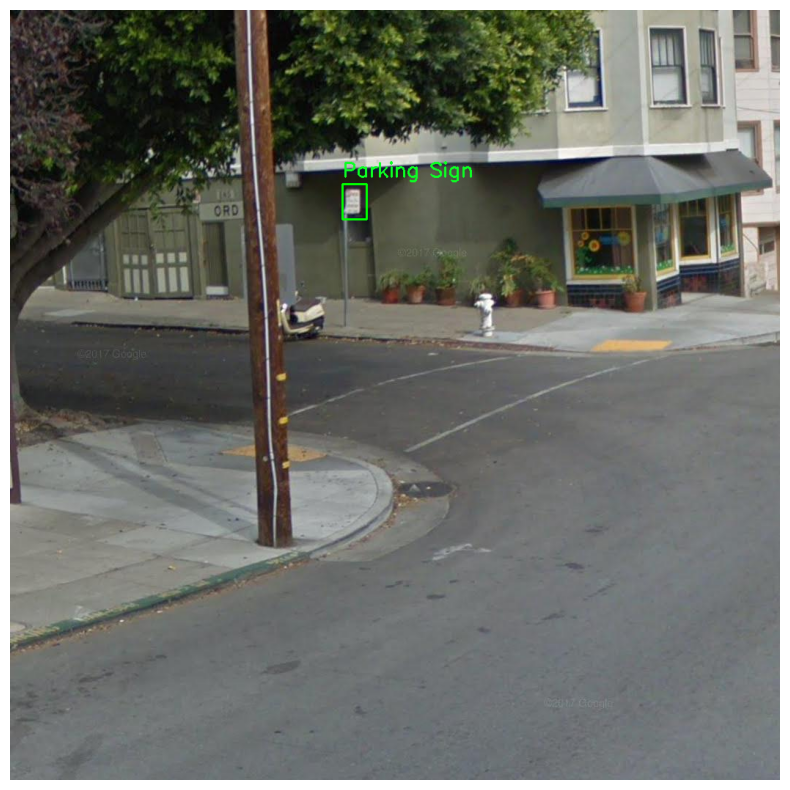

In [57]:
img = cv2.imread(str(path))

cv2.rectangle(img, (bounding_box['xmin'], bounding_box['ymin']), (bounding_box['xmax'], bounding_box['ymax']), (0, 255, 0), 2)

cv2.putText(img, bounding_box['label'], (bounding_box['xmin'], bounding_box['ymin']-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
grayscale_image = color_image.convert("L")
plt.imshow(grayscale_image)

In [ ]:
overlay = Image.new('RGBA', grayscale_image.size, (0, 0, 0, 0))
overlay_draw = ImageDraw.Draw(overlay)
fill_color = (255, 0, 0, 64)
overlay_draw.rectangle(coordinates, fill=fill_color)

# Blend the overlay with the base image
combined = Image.alpha_composite(grayscale_image, overlay)

# Now you can show the combined image
plt.imshow(combined)
plt.axis('off')
plt.show()

In [16]:
import csv
import json

# Replace 'your_csv_file.csv' with the path to your actual CSV file
csv_file_path = '/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset_annotations.csv'
json_file_path = '/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/annotations.json'

# Assuming you are serving images from localhost at port 8000
base_url = '/data/local-files/?d=Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset/'

data_for_json = []

with open(csv_file_path, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    csv_reader.fieldnames = [name.strip() for name in csv_reader.fieldnames]
    
    for row in csv_reader:
        image_url = f'{base_url}{row["image_name"].strip()}'
        
        xmin, xmax, ymin, ymax = map(float, [row['xmin'].strip(), row['xmax'].strip(), row['ymin'].strip(), row['ymax'].strip()])
        # x, y, width, height = xmin, ymin, xmax - xmin, ymax - ymin

        image_width = 1050
        image_height = 1050
        x = (xmin / image_width) * 100
        y = (ymin / image_height) * 100
        width = ((xmax - xmin) / image_width) * 100
        height = ((ymax - ymin) / image_height) * 100
        
        annotation = {
            "data": {
                "image": image_url
            },
            "predictions": [
                {
                    "result": [
                        {
                            "original_width": 1050, 
                            "original_height": 1050,
                            "image_rotation": 0,
                            "value": {
                                "x": x,
                                "y": y,
                                "width": width,
                                "height": height,
                                "rotation": 0
                            },
                            "from_name": "rect",
                            "to_name": "image",
                            "type": "rectangle"                            
                        }
                    ]
                }
            ]
        }
        
        data_for_json.append(annotation)

with open(json_file_path, 'w') as json_file:
    json.dump(data_for_json, json_file, indent=4)

print(f"JSON file created at {json_file_path}")


JSON file created at /Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/annotations.json


In [5]:
import csv
import json

# Replace with the path to your actual CSV file and JSON output file
csv_file_path = '/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset_annotations.csv'
json_file_path = '/Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/annotations.json'

# Base URL for serving images
base_url = '/data/local-files/?d=Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/trainingset/'

# Dictionary to hold the data grouped by image_name
grouped_data = {}

with open(csv_file_path, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    csv_reader.fieldnames = [name.strip() for name in csv_reader.fieldnames]
    for row in csv_reader:
        image_name = row["image_name"].strip()
        image_url = f'{base_url}{image_name}'
        
        # Convert bounding box coordinates from pixels to percentages
        xmin, xmax, ymin, ymax = map(float, [row['xmin'].strip(), row['xmax'].strip(), row['ymin'].strip(), row['ymax'].strip()])
        image_width, image_height = 1050, 1050  # Assuming fixed dimensions for simplicity
        x = (xmin / image_width) * 100
        y = (ymin / image_height) * 100
        width = ((xmax - xmin) / image_width) * 100
        height = ((ymax - ymin) / image_height) * 100
        
        # Create the annotation result
        result = {
            "original_width": 1050,
            "original_height": 1050,
            "image_rotation": 0,
            "value": {
                "x": x,
                "y": y,
                "width": width,
                "height": height,
                "rotation": 0
            },
            "from_name": "rect",
            "to_name": "image",
            "type": "rectangle"
        }
        
        # Group annotations by image
        if image_name not in grouped_data:
            grouped_data[image_name] = {
                "data": {
                    "image": image_url
                },
                "predictions": [
                    {
                        "result": [result]
                    }
                ]
            }
        else:
            grouped_data[image_name]["predictions"][0]["result"].append(result)

# Convert the grouped data to a list format suitable for JSON output
data_for_json = list(grouped_data.values())

# Write the JSON data to a file
with open(json_file_path, 'w') as json_file:
    json.dump(data_for_json, json_file, indent=4)

print(f"JSON file created at {json_file_path}")


JSON file created at /Users/saad/Documents/GitHub/NoParkingAllowed/SF Parking Sign Detection/annotations.json
